In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import datasets

In [2]:
boston = datasets.load_boston()

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# Separando os dados
X = boston.data
y = boston.target

In [5]:
X.shape

(506, 13)

In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

## 1. Dado o código a seguir (Fonte: Datacamp - Curso Supervised Learning with scikit-learn), use a regressão Lasso, que usa regularização L1, sobre o dataset Boston House Prices (sklearn.datasets.load_boston) para:

In [8]:
from sklearn.linear_model import Lasso

## a) Mostre os coeficientes para alpha=0.1 e normalize=True. Mostre também para normalize=False.

### a.1) normalize=True

In [9]:
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1, normalize=True)

In [10]:
lasso_pred = lasso.predict(X_test)

In [11]:
lasso.score(X_test, y_test)

0.5950229535328548

In [12]:
lasso.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        3.18852894, -0.        , -0.        , -0.        , -0.        ,
       -0.3066901 ,  0.        , -0.48666476])

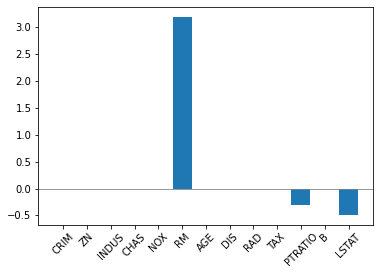

In [13]:
plt.bar(boston.feature_names, lasso.coef_)
plt.axhline(0, color='grey', linewidth=0.8)
plt.xticks(rotation=45);

### a.2) normalize=False

In [14]:
lasso = Lasso(alpha=0.1, normalize=False)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [15]:
lasso_pred = lasso.predict(X_test)

In [16]:
lasso.score(X_test, y_test)

0.6918147952283056

In [17]:
lasso.coef_

array([-1.22854422e-01,  3.86385849e-02, -4.97188385e-04,  1.48353759e+00,
       -0.00000000e+00,  3.89367421e+00, -1.96048179e-02, -1.10561397e+00,
        2.16673479e-01, -1.05844004e-02, -7.44014516e-01,  1.23959059e-02,
       -6.02281637e-01])

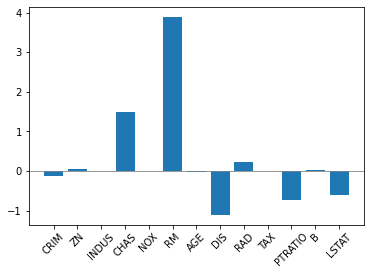

In [18]:
plt.bar(boston.feature_names, lasso.coef_)
plt.axhline(0, color='grey', linewidth=0.8)
plt.xticks(rotation=45);

## b) Mostre os coeficientes para alpha=0.4 e normalize=True. Mostre também para normalize=False.

### b.1) normalize=True

In [19]:
lasso = Lasso(alpha=0.4, normalize=True)
lasso.fit(X_train, y_train)

Lasso(alpha=0.4, normalize=True)

In [20]:
lasso_pred = lasso.predict(X_test)

In [21]:
lasso.score(X_test, y_test)

-0.03469753992352409

In [22]:
lasso.coef_

array([-0.,  0., -0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,  0., -0.])

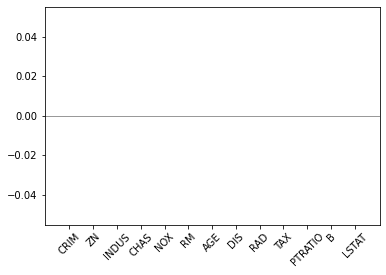

In [23]:
plt.bar(boston.feature_names, lasso.coef_)
plt.axhline(0, color='grey', linewidth=0.8)
plt.xticks(rotation=45);

### b.2) normalize=False

In [24]:
lasso = Lasso(alpha=0.4, normalize=False)
lasso.fit(X_train, y_train)

Lasso(alpha=0.4)

In [25]:
lasso_pred = lasso.predict(X_test)

In [26]:
lasso.score(X_test, y_test)

0.6868261870937583

In [27]:
lasso.coef_

array([-0.11576163,  0.0382639 , -0.        ,  0.        , -0.        ,
        3.02904787, -0.00594293, -0.94591883,  0.21832368, -0.0105426 ,
       -0.73995647,  0.01213879, -0.66980952])

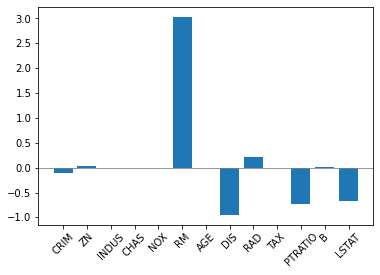

In [28]:
plt.bar(boston.feature_names, lasso.coef_)
plt.axhline(0, color='grey', linewidth=0.8)
plt.xticks(rotation=45);

## c) Houve feature(s) removida(s) em alguma configuração acima? Qual(is)?

### alpha=0.1 e normalize=True
Feature removidas: 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'B'

### alpha=0.1 e normalize=False
Feature removidas: 'NOX'

### alpha=0.4 e normalize=True
Feature removidas: 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'

### alpha=0.4 e normalize=False
Feature removidas: 'INDUS', 'CHAS', 'NOX'

# 2. Dado o código a seguir (Fonte: Datacamp - Curso Supervised Learning with scikit-learn), use a regressão Ridge, que usa regularização L2, sobre o dataset Boston House Prices (sklearn.datasets.load_boston) para:

In [29]:
from sklearn.linear_model import Ridge

### a) Adapte o código acima para mostrar em um gráfico os scores (R^2) sobre o conjunto de teste para os seguintes valores de alpha: [1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]. Use normalize=True. Esses valores de alpha podem ser facilmente obtidos no numpy usando: valores_alpha = np.logspace(-4, 0, 5).

In [30]:
valores_alpha = np.logspace(-4, 0, 5)

In [31]:
result = []
for alpha in valores_alpha:
    ridge = Ridge(alpha=alpha, normalize=True)
    ridge.fit(X_train, y_train)
    ridge_pred = ridge.predict(X_test)
    res = ridge.score(X_test, y_test)
    result.append(res)

In [32]:
result

[0.7112111590981025,
 0.7110775704734216,
 0.7097594050919812,
 0.6996938275127313,
 0.6241064474736235]

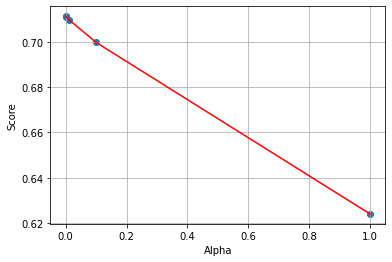

In [33]:
plt.scatter(valores_alpha, result)
plt.plot(valores_alpha, result, c='r')
plt.grid()
plt.xlabel('Alpha')
plt.ylabel('Score');

### b) Mostre o mesmo para normalize=False.

In [34]:
valores_alpha = np.logspace(-4, 0, 5)

In [35]:
result = []
for alpha in valores_alpha:
    ridge = Ridge(alpha=alpha, normalize=False)
    ridge.fit(X_train, y_train)
    ridge_pred = ridge.predict(X_test)
    res = ridge.score(X_test, y_test)
    result.append(res)

In [36]:
result

[0.7112250981524468,
 0.711216928951723,
 0.7111351633163309,
 0.7103178206391327,
 0.7041586727559436]

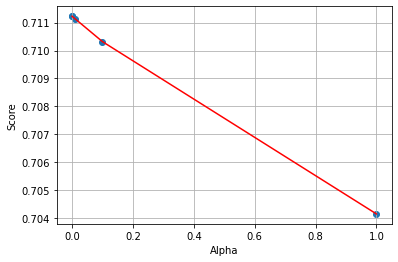

In [37]:
plt.scatter(valores_alpha, result)
plt.plot(valores_alpha, result, c='r')
plt.grid()
plt.xlabel('Alpha')
plt.ylabel('Score');

### c) Agora pegue os hiperparâmetros do melhor resultado que você obteve. Treine um novo modelo usando-os, mas mudando agora a quantidade de épocas (hiperparâmetro max_iter) para apenas 10 (o valor default é 1000). Qual o score R^2 sobre o conjunto de teste para o novo modelo?

In [38]:
ridge = Ridge(alpha=valores_alpha[0], normalize=False, max_iter=10)
ridge.fit(X_train, y_train)

Ridge(alpha=0.0001, max_iter=10)

In [39]:
ridge_pred = ridge.predict(X_test)

In [40]:
ridge.score(X_test, y_test)

0.7112250981524468